In [121]:
import pandas as pd # Librería para estructura de datos
import seaborn as sns # Librería para poder crear gráficos estadísticos
import matplotlib.pyplot as plt # Librería para poder graficar
from sklearn.preprocessing import MinMaxScaler # Librería para el escalado de datos
from sklearn.model_selection import train_test_split # Librería para procesar datos
from tensorflow.keras.models import Sequential # Librería para el modelo neuronal
from tensorflow.keras.layers import Dense # Librería para el modelo neuronal
from sklearn.metrics import mean_absolute_error # Librería para calcular el error absoluto
import missingno as msno # Para datos perdidos
from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
#from fancyimpute import IterativeImputer as MI

In [122]:
df = pd.read_csv("bank-additional-full.csv", delimiter=";") # df representa DataFrame
df # para ver el DataFrame

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [124]:
df.describe().transpose() # Describe: calcula un resumen de las estadísticas relacionadas con las columnas DataFrame
                          # Transpose: cambia filas por columnas 

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [125]:
df.isnull().sum() # Verificar si hay datos nulos

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [126]:
df = df.drop(['pdays','nr.employed'],axis=1)

In [127]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,nonexistent,-1.1,94.767,-50.8,1.028,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,nonexistent,-1.1,94.767,-50.8,1.028,yes


In [128]:
le = LabelEncoder()
df['job']=le.fit_transform(df['job'])
df['education']=le.fit_transform(df['education'])
df['month']=le.fit_transform(df['month'])
df['day_of_week']=le.fit_transform(df['day_of_week'])

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  object 
 3   education       41188 non-null  int64  
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [130]:
X = df.drop(['y'],axis=1)
y = df['y']

In [131]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
0,56,3,married,0,no,no,no,telephone,6,1,261,1,0,nonexistent,1.1,93.994,-36.4,4.857
1,57,7,married,3,unknown,no,no,telephone,6,1,149,1,0,nonexistent,1.1,93.994,-36.4,4.857
2,37,7,married,3,no,yes,no,telephone,6,1,226,1,0,nonexistent,1.1,93.994,-36.4,4.857
3,40,0,married,1,no,no,no,telephone,6,1,151,1,0,nonexistent,1.1,93.994,-36.4,4.857
4,56,7,married,3,no,no,yes,telephone,6,1,307,1,0,nonexistent,1.1,93.994,-36.4,4.857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,married,5,no,yes,no,cellular,7,0,334,1,0,nonexistent,-1.1,94.767,-50.8,1.028
41184,46,1,married,5,no,no,no,cellular,7,0,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028
41185,56,5,married,6,no,yes,no,cellular,7,0,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028
41186,44,9,married,5,no,no,no,cellular,7,0,442,1,0,nonexistent,-1.1,94.767,-50.8,1.028


In [132]:
X_dummies = pd.get_dummies(X)

In [133]:
X_dummies

,age,job,education,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,3,0,6,1,261,1,0,1.1,93.994,...,0,0,1,0,0,0,1,0,1,0
1,57,7,3,6,1,149,1,0,1.1,93.994,...,0,0,1,0,0,0,1,0,1,0
2,37,7,3,6,1,226,1,0,1.1,93.994,...,0,1,1,0,0,0,1,0,1,0
3,40,0,1,6,1,151,1,0,1.1,93.994,...,0,0,1,0,0,0,1,0,1,0
4,56,7,3,6,1,307,1,0,1.1,93.994,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,5,7,0,334,1,0,-1.1,94.767,...,0,1,1,0,0,1,0,0,1,0
41184,46,1,5,7,0,383,1,0,-1.1,94.767,...,0,0,1,0,0,1,0,0,1,0
41185,56,5,6,7,0,189,2,0,-1.1,94.767,...,0,1,1,0,0,1,0,0,1,0
41186,44,9,5,7,0,442,1,0,-1.1,94.767,...,0,0,1,0,0,1,0,0,1,0


In [134]:
y.value_counts() # Para variables categóricas podemos ver este tipo de especificaciones. (Cuenta las categorías)

no     36548
yes     4640
Name: y, dtype: int64

In [135]:
# Vemos que por los datos, no está balanceada. (60-40 máximo. 70-30 ya no)
# Dos técnicas de balanceo: Undersampling y Oversampling (Dentro de esta. Smote (Frankenstain))
# En regresión (valores numéricos) no puedo hacer balanceo
# En clasificación si puedo hacer balanceo.
# No balancear datos cuando no sea necesario (pueden salir falsos-positivos, esto se elimina con otra técnica)
# Mucho desbalanceo: Undersampling


# UnderSampling

In [136]:
rus=RandomUnderSampler(random_state = 0) # Para cosas aleatorias, suar una semilla
X_rus, y_rus = rus.fit_resample(X_dummies,y)

In [137]:
y_rus.value_counts()

no     4640
yes    4640
Name: y, dtype: int64

# OverSampling

In [138]:
ros = RandomOverSampler(random_state = 0)
X_ros, y_ros = ros.fit_resample(X_dummies,y)

In [139]:
y_ros.value_counts()

no     36548
yes    36548
Name: y, dtype: int64

# SMOTE

In [140]:
smo = SMOTE(random_state = 0)
X_smo, y_smo = smo.fit_resample(X_dummies,y)

In [141]:
y_smo.value_counts()

no     36548
yes    36548
Name: y, dtype: int64

# Eliminación de Atípicos

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'job'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day_of_week'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>,
        <Axes: title={'center': 'cons.price.idx'}>],
       [<Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>,
        <Axes: title={'center': 'marital_divorced'}>,
        <Axes: title={'center': 'marital_married'}>,
        <Axes: title={'center': 'marital_single'}>],
       [<Axes: title={'center': 'marital_unknown'}>,
        <Axes: title={'center': 'default_no'}>,
        <Axes: title={'center': 'default_unknown'}>,
        <Axes: title={'center': 'default_yes'}>,
        <Axes: title={'center': 'housing_no'}>],
       [<Axes: title={'center': 'ho

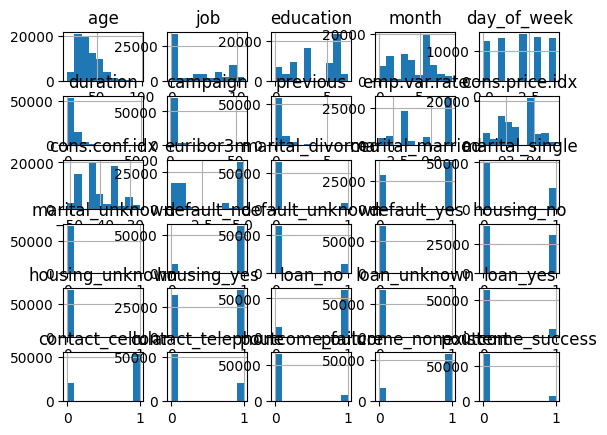

In [142]:
# Evaluar el modelo para saber si se usa Linealidad o no
X_ros.hist()

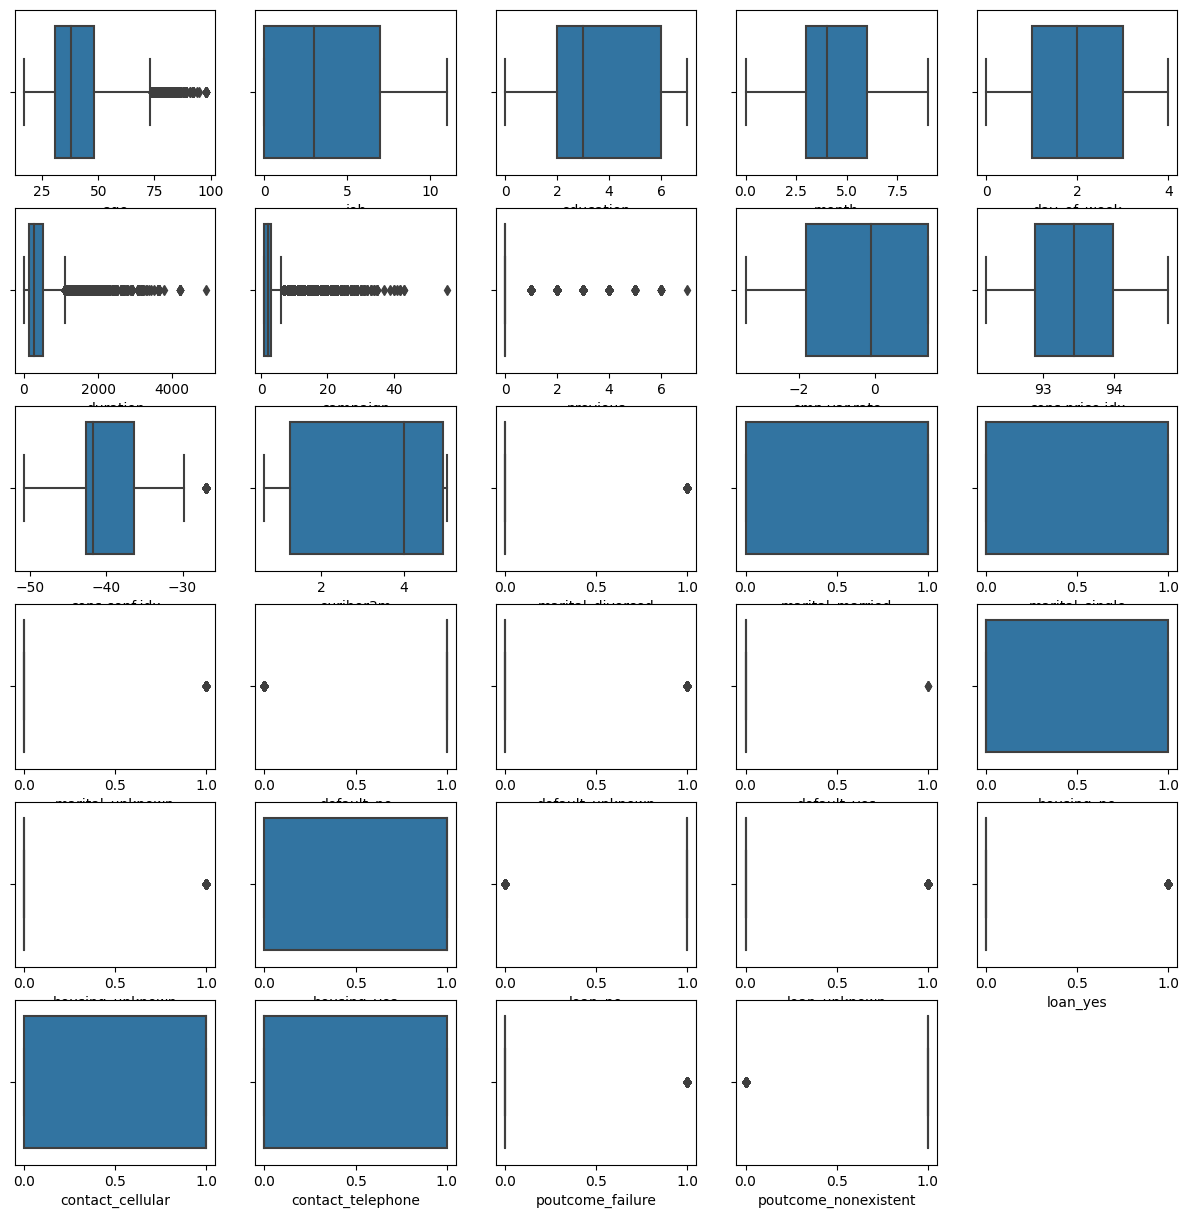

In [143]:
plt.figure(figsize=(15,15))
col = X_ros.columns[:-1]
for i in enumerate(col):
  plt.subplot(6,5,i[0]+1) # En la misma figura poner más figuras
  sns.boxplot(x=i[1],data=X_ros)

In [144]:
for i in col:
  q1 = X_ros[i].quantile(0.10)
  q4 = X_ros[i].quantile(0.90)
  X_ros[i][X_ros[i]<=q1] = q1
  X_ros[i][X_ros[i]>=q4] = q4

<ipython-input-144-e55e5ff296bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ros[i][X_ros[i]<=q1] = q1
<ipython-input-144-e55e5ff296bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ros[i][X_ros[i]>=q4] = q4
<ipython-input-144-e55e5ff296bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ros[i][X_ros[i]<=q1] = q1
<ipython-input-144-e55e5ff296bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

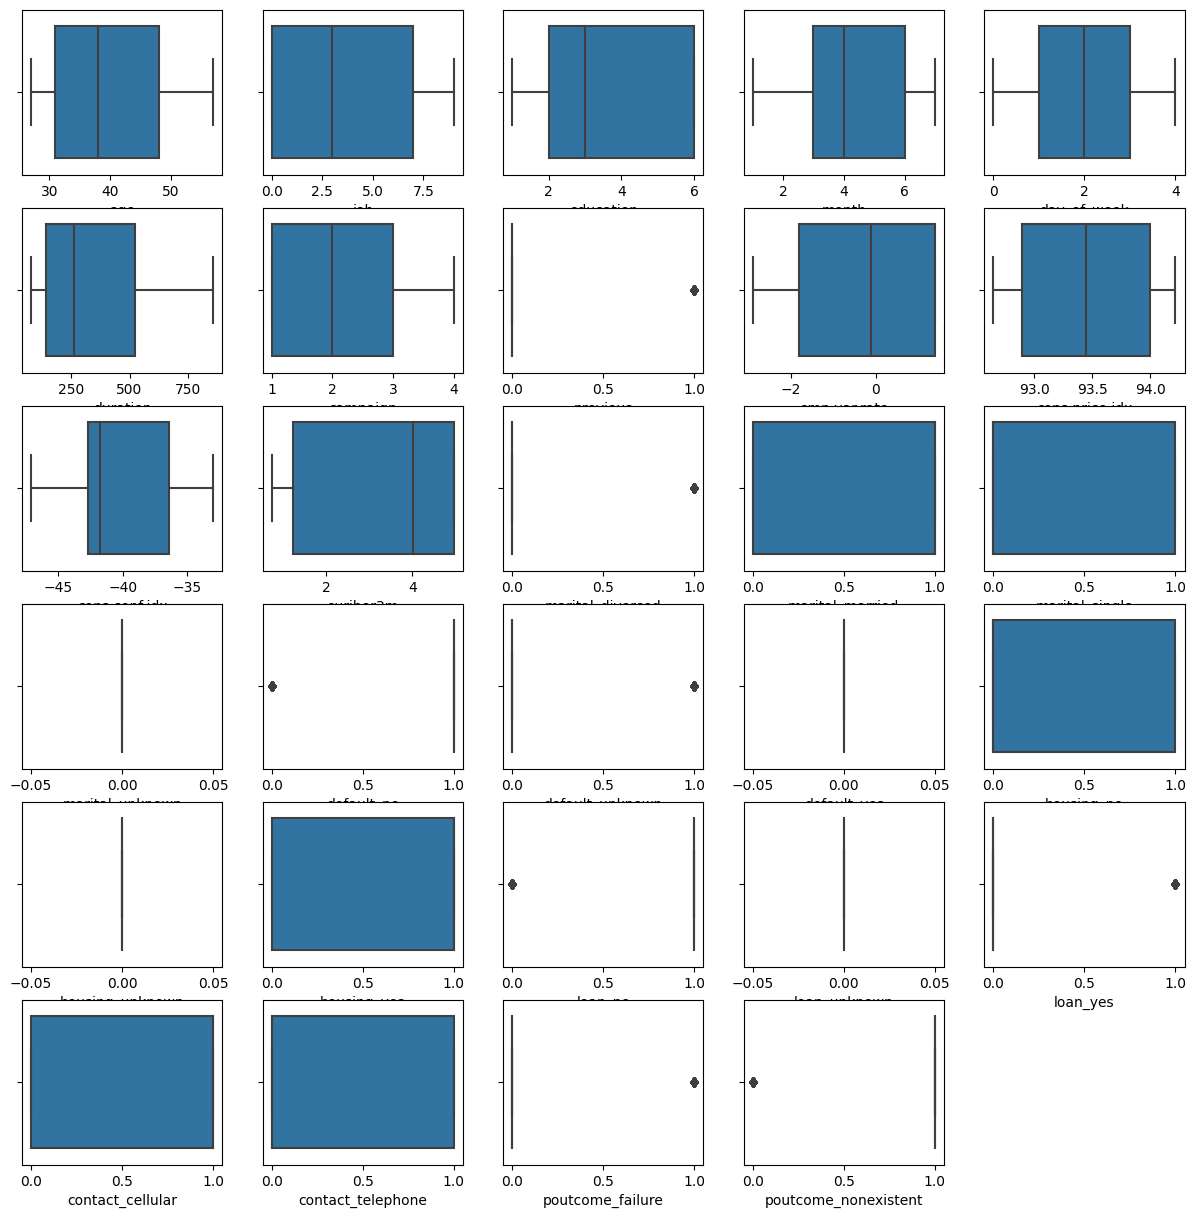

In [145]:
plt.figure(figsize=(15,15))
col = X_ros.columns[:-1]
for i in enumerate(col):
  plt.subplot(6,5,i[0]+1) # En la misma figura poner más figuras
  sns.boxplot(x=i[1],data=X_ros)

# Modelado para OverSampling

In [146]:
# Escalado de datos
scalerMinMax = MinMaxScaler()
scalerMinMax.fit(X_ros)
X_ros = scalerMinMax.transform(X_ros)

In [147]:
X_ros

array([[0.96666667, 0.33333333, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.77777778, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.77777778, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.36666667, 0.22222222, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.16666667, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.43333333, 0.22222222, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [148]:
y_dummies = pd.get_dummies(y)

In [149]:
y_dummies

,no,yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
41183,0,1
41184,1,0
41185,1,0
41186,0,1


In [150]:
y_ros_dummies = pd.get_dummies(y_ros)

In [151]:
y_ros_dummies

,no,yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
73091,0,1
73092,0,1
73093,0,1
73094,0,1


In [152]:
# Con la base de datos ya limpia, se procede con el Modelo
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros,y_ros_dummies,random_state=80,test_size=0.3)

In [153]:
# Modelo Neuronal
modelANN = Sequential()
modelANN.add(Dense(28,activation='relu')) 
modelANN.add(Dense(14,activation='relu'))
modelANN.add(Dense(7,activation='relu'))  
modelANN.add(Dense(2,activation='sigmoid'))

modelANN.compile(optimizer = "adam",
               loss = "categorical_crossentropy",
               metrics=['accuracy'])

In [154]:
X_train_ros.shape

(51167, 30)

In [155]:
y_train_ros.shape

(51167, 2)

In [156]:
X_test_ros.shape

(21929, 30)

In [157]:
y_test_ros.shape

(21929, 2)

In [158]:
modelANN.fit(x = X_train_ros, y = y_train_ros, validation_data=(X_test_ros,y_test_ros), batch_size=100, epochs=150, verbose=1) # Entrenar los datos

Epoch 1/150
512/512 [==============================] - 2s 3ms/step - loss: 0.3933 - accuracy: 0.8282 - val_loss: 0.3313 - val_accuracy: 0.8618
Epoch 2/150
512/512 [==============================] - 1s 2ms/step - loss: 0.3233 - accuracy: 0.8673 - val_loss: 0.3231 - val_accuracy: 0.8635
Epoch 3/150
512/512 [==============================] - 1s 2ms/step - loss: 0.3143 - accuracy: 0.8696 - val_loss: 0.3146 - val_accuracy: 0.8672
Epoch 4/150
512/512 [==============================] - 2s 4ms/step - loss: 0.3083 - accuracy: 0.8712 - val_loss: 0.3075 - val_accuracy: 0.8706
Epoch 5/150
512/512 [==============================] - 1s 3ms/step - loss: 0.3027 - accuracy: 0.8724 - val_loss: 0.3044 - val_accuracy: 0.8680
Epoch 6/150
512/512 [==============================] - 1s 3ms/step - loss: 0.2968 - accuracy: 0.8746 - val_loss: 0.2973 - val_accuracy: 0.8715
Epoch 7/150
512/512 [==============================] - 1s 2ms/step - loss: 0.2942 - accuracy: 0.8759 - val_loss: 0.2959 - val_accuracy: 0.8735

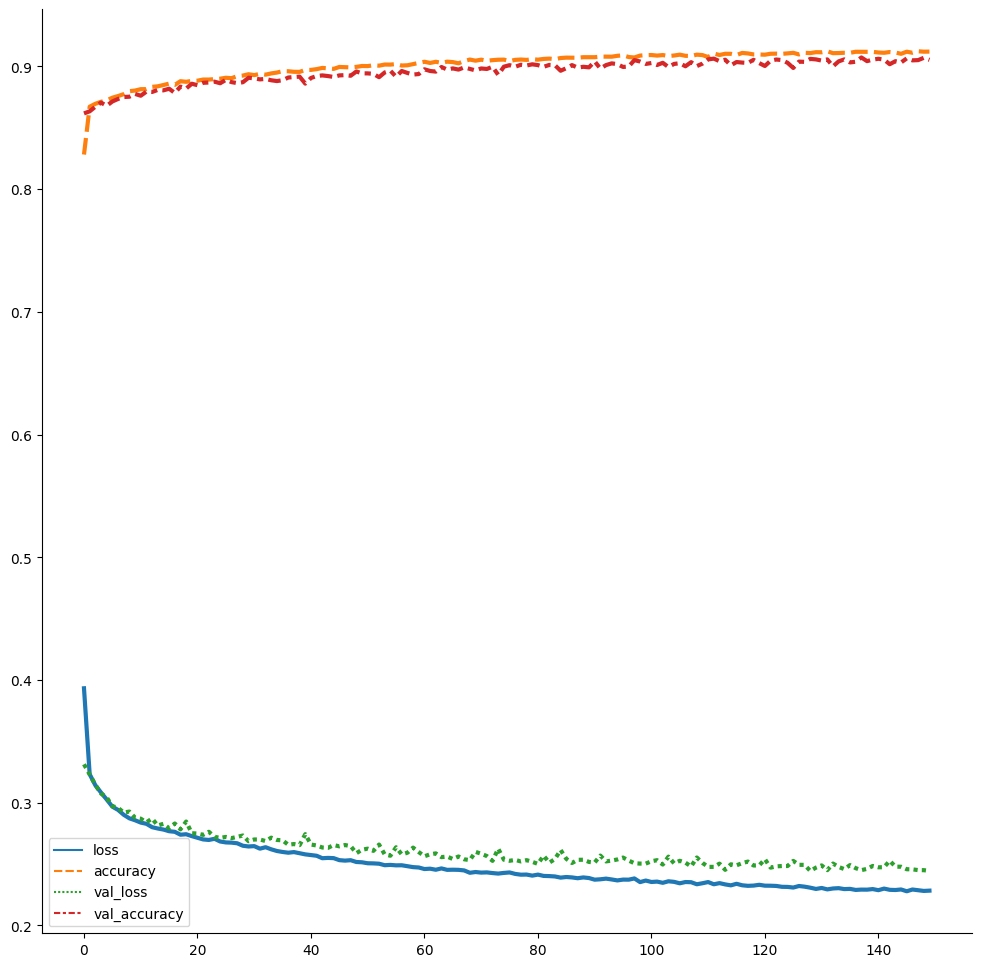

In [159]:
# Graficar la pérdida
loss = pd.DataFrame(modelANN.history.history)
plt.figure(figsize=(12,12))
sns.lineplot(data=loss, lw=3)
sns.despine()

# Modelado para UnderSampling

In [160]:
# Escalado de datos
scalerMinMax = MinMaxScaler()
scalerMinMax.fit(X_rus)
X_rus = scalerMinMax.transform(X_rus)

In [161]:
y_rus_dummies = pd.get_dummies(y_rus)

In [162]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus,y_rus_dummies,random_state=80,test_size=0.3)

In [164]:
# Modelo Neuronal
modelANN = Sequential()
modelANN.add(Dense(28,activation='relu')) 
modelANN.add(Dense(14,activation='relu'))
modelANN.add(Dense(7,activation='relu'))  
modelANN.add(Dense(2,activation='sigmoid'))

modelANN.compile(optimizer = "adam",
               loss = "categorical_crossentropy",
               metrics=['accuracy'])

In [165]:
modelANN.fit(x = X_train_rus, y = y_train_rus, validation_data=(X_test_rus,y_test_rus), batch_size=100, epochs=110, verbose=1) # Entrenar los datos

Epoch 1/110
65/65 [==============================] - 2s 9ms/step - loss: 0.6529 - accuracy: 0.6247 - val_loss: 0.5974 - val_accuracy: 0.6961
Epoch 2/110
65/65 [==============================] - 0s 4ms/step - loss: 0.5675 - accuracy: 0.7032 - val_loss: 0.5482 - val_accuracy: 0.7245
Epoch 3/110
65/65 [==============================] - 0s 4ms/step - loss: 0.5239 - accuracy: 0.7331 - val_loss: 0.5094 - val_accuracy: 0.7443
Epoch 4/110
65/65 [==============================] - 0s 4ms/step - loss: 0.4810 - accuracy: 0.7752 - val_loss: 0.4618 - val_accuracy: 0.7956
Epoch 5/110
65/65 [==============================] - 0s 4ms/step - loss: 0.4394 - accuracy: 0.8037 - val_loss: 0.4198 - val_accuracy: 0.8179
Epoch 6/110
65/65 [==============================] - 0s 4ms/step - loss: 0.4012 - accuracy: 0.8284 - val_loss: 0.3899 - val_accuracy: 0.8337
Epoch 7/110
65/65 [==============================] - 0s 3ms/step - loss: 0.3769 - accuracy: 0.8439 - val_loss: 0.3762 - val_accuracy: 0.8524
Epoch 8/110
6

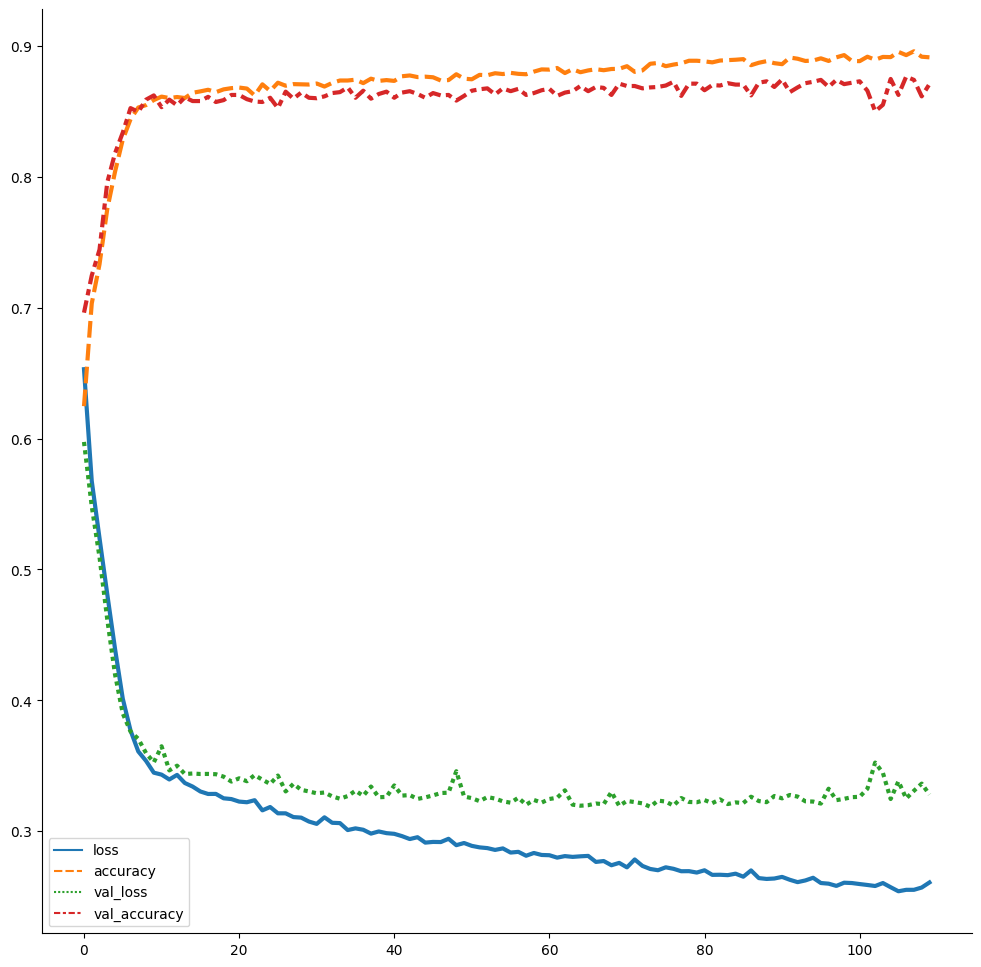

In [166]:
# Graficar la pérdida
loss = pd.DataFrame(modelANN.history.history)
plt.figure(figsize=(12,12))
sns.lineplot(data=loss, lw=3)
sns.despine()

# Modelado para SMOTE

In [167]:
# Escalado de datos
scalerMinMax = MinMaxScaler()
scalerMinMax.fit(X_smo)
X_smo = scalerMinMax.transform(X_smo)

In [168]:
y_smo_dummies = pd.get_dummies(y_smo)

In [169]:
X_train_smo, X_test_smo, y_train_smo, y_test_smo = train_test_split(X_smo,y_smo_dummies,random_state=80,test_size=0.3)

In [170]:
# Modelo Neuronal
modelANN = Sequential()
modelANN.add(Dense(28,activation='relu')) 
modelANN.add(Dense(14,activation='relu'))
modelANN.add(Dense(7,activation='relu'))  
modelANN.add(Dense(2,activation='sigmoid'))

modelANN.compile(optimizer = "adam",
               loss = "categorical_crossentropy",
               metrics=['accuracy'])

In [171]:
modelANN.fit(x = X_train_smo, y = y_train_smo, validation_data=(X_test_smo,y_test_smo), batch_size=100, epochs=100, verbose=1) # Entrenar los datos

Epoch 1/100
512/512 [==============================] - 2s 3ms/step - loss: 0.2979 - accuracy: 0.8736 - val_loss: 0.1694 - val_accuracy: 0.9321
Epoch 2/100
512/512 [==============================] - 2s 3ms/step - loss: 0.1643 - accuracy: 0.9320 - val_loss: 0.1582 - val_accuracy: 0.9326
Epoch 3/100
512/512 [==============================] - 2s 3ms/step - loss: 0.1583 - accuracy: 0.9345 - val_loss: 0.1566 - val_accuracy: 0.9319
Epoch 4/100
512/512 [==============================] - 1s 2ms/step - loss: 0.1553 - accuracy: 0.9343 - val_loss: 0.1560 - val_accuracy: 0.9352
Epoch 5/100
512/512 [==============================] - 1s 2ms/step - loss: 0.1517 - accuracy: 0.9353 - val_loss: 0.1531 - val_accuracy: 0.9308
Epoch 6/100
512/512 [==============================] - 1s 2ms/step - loss: 0.1500 - accuracy: 0.9348 - val_loss: 0.1464 - val_accuracy: 0.9346
Epoch 7/100
512/512 [==============================] - 1s 2ms/step - loss: 0.1463 - accuracy: 0.9365 - val_loss: 0.1548 - val_accuracy: 0.9316

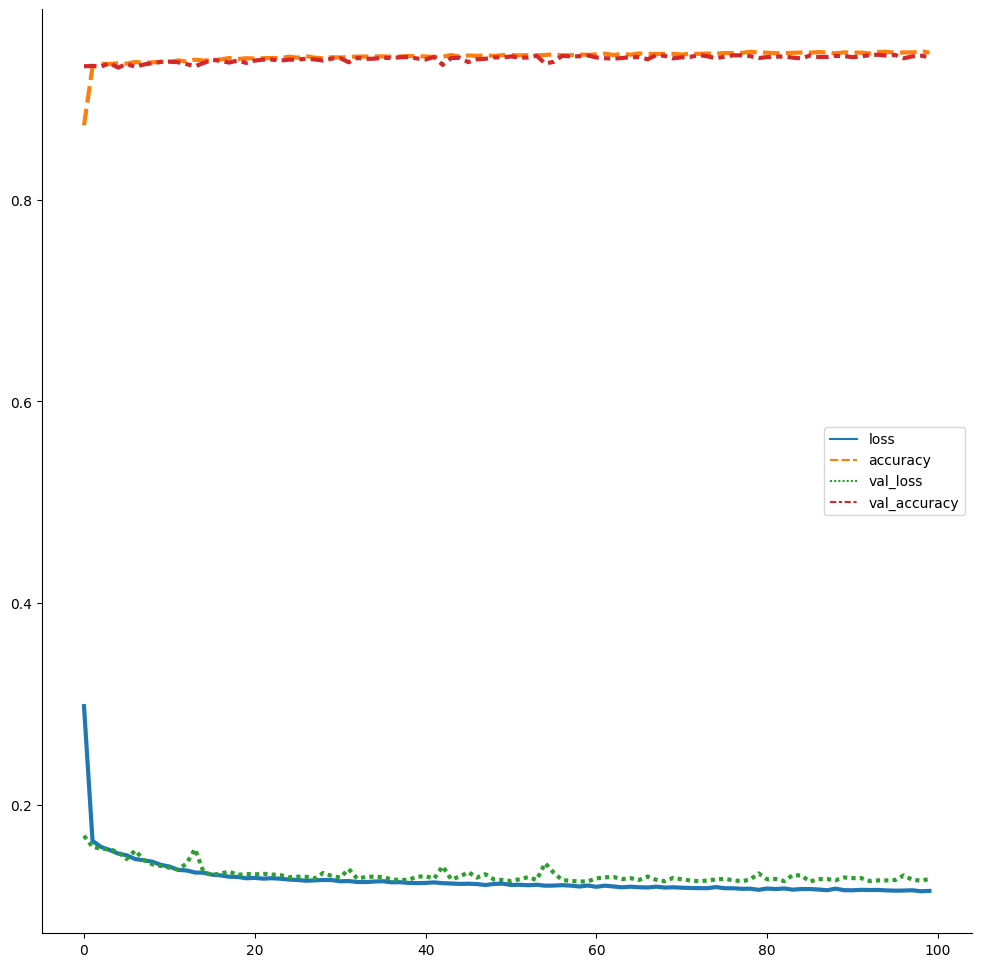

In [172]:
# Graficar la pérdida
loss = pd.DataFrame(modelANN.history.history)
plt.figure(figsize=(12,12))
sns.lineplot(data=loss, lw=3)
sns.despine()